<a href="https://colab.research.google.com/github/niqolla/bayesian_statistics_bioinformatics/blob/main/AST_A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from itertools import product 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

### 1
****
Write a function that takes a number of dices and returns all the possible outcomes for that amount of dice.

In [ ]:
def build_rolls(dice_num):
    return list(product(range(1,7), repeat=dice_num))

    For the range(1,7) [1,2,3,4,5,6] repeated by the number of dice (dice_num) 
    this function returns a list of possible outcomes.

### 2
****
Write functions that return, given five dice, True or False if we have Straight, Full, Poker, or Generala.



In [ ]:
## Straight

def is_Straight(input_list):
  if len(set(input_list)) == 5:
    return True
  return False


    is_Straight returns True if all 5 elements are different, as specified in the assignment.

In [ ]:
## Full

def is_Full(input_list):
  if len(set(input_list)) == 2:
    set_list = list(set(input_list))
    count_1 = input_list.count(set_list[0])
    count_2 = input_list.count(set_list[1])
    if (count_1==3 and count_2==2) or (count_1==2 and count_2==3):
      return True
  return False


    is_Full counts it there are 2 unique elements in the list and if one of 
    them is repeated 3 times and the other 2 times. 

In [ ]:
## Poker

def is_Poker(input_list):
  if len(set(input_list)) == 2:
    set_list = list(set(input_list))
    count_1 = input_list.count(set_list[0])
    count_2 = input_list.count(set_list[1])
    if (count_1==4 and count_2==1) or (count_1==1 and count_2==4):
      return True
  return False


    is_Poker counts it there are 2 unique elements in the list and if one of 
    them is repeated 4 times and the other 1 time. 

In [ ]:
## Generala

def is_Generala(input_list):
  if len(set(input_list))==1:
    return True
  return False


    is_Generala checks if there is only 1 unique element in the list, 
    ie. if 1 element is repeated 5 times

###3
****
Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands served (1st roll).

In [ ]:
roll = [1, 2, 3, 4, 5, 6]

event_space = []

event = []

for a in roll:
  for b in roll:
    for c in roll:
      for d in roll:
        for e in roll:
            event = []
            event.append(a)
            event.append(b)
            event.append(c)
            event.append(d)
            event.append(e)
            event_space.append(event)
            # an event is a combination of the outcome of all 5 die


    This code returs for each die all the possible outcomes. 
    ex. for [1,1,1,1,_] it goes through all possible outcomes for the 5th position
    and this happends for all possible outcomes of all 5 die 

In [ ]:
total = len(event_space)

a=0
for i in event_space:
  if len(set(i)) == 5:
    a+=1
print(f"Straight: {a}")
print(f"P: {a/total}")

# here I chech for every element in the event space if it's a straight : 
# all 5 dice are different numbers

print("------")

a=0
for i in event_space:
  if len(set(i)) == 2:
    set_list = list(set(i))
    count_1 = i.count(set_list[0])
    count_2 = i.count(set_list[1])
    if (count_1==3 and count_2==2) or (count_1==2 and count_2==3):
      a+=1
print(f"Full: {a}")
print(f"P: {a/total}")

# here I chech for every element in the event space if it's a full : 
# 2 unique elements - one 3 times, the other 2

print("------")

a=0
for i in event_space:
  if len(set(i)) == 2:
    set_list = list(set(i))
    count_1 = i.count(set_list[0])
    count_2 = i.count(set_list[1])
    if (count_1==4 and count_2==1) or (count_1==1 and count_2==4):
      a+=1
print(f"Poker: {a}")
print(f"P: {a/total}")

# here I check if its a poker : 
# 2 elements - one 4 times, the other once

print("------")

a=0
for i in event_space:
  if len(set(i)) == 1:
    a+=1
print(f"Generala: {a}")
print(f"P: {a/total}")

# here I check if its a generala, 
# ei. if there is only one unique element


Straight: 720
P: 0.09259259259259259
------
Full: 300
P: 0.038580246913580245
------
Poker: 150
P: 0.019290123456790122
------
Generala: 6
P: 0.0007716049382716049


###4
*****
Write a function that simulates a roll with n fair dice.



In [ ]:
import random

In [ ]:
def roll_dice(dice_num):
  result = []
  events = [1,2,3,4,5,6]
  for i in range(0,dice_num):
    result.append(random.choice(events))
  return result

    This function generates a random number from the list of [1,2,3,4,5,6], and is repeated by the number of dice (dice_num times).
    The output for each iteration is appended to a list that starts out empty, and then the list is returned.

###5
***
Write a function that plays automatically (max 3 rolls), always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise. 

  Which kind of distribution follows this function results? Explain your reasoning within the delivered python notebook.

In [ ]:
def greedy_generala():

  what_we_want = 0
  dict_of_counts={}
  count_so_far=0
  hand = 1

  straigth = []

  while hand <= 3: 
    # at the end of the while loop we add +1 to {hand} so when it gets to 4 it's stopped
    # i used <= 3 because hand starts out being equal to 1

    served = roll_dice(5-count_so_far)
    # a new random list of {5-count_so_far} elements is generated
    # count_so_far is the number of die that have the same number on them, 
    # it starts out being 0 so in hand = 1, server = roll_dice(5)

    straigth.append(is_Straight(served))
    # check if it's a straight, because there we have no elements that are the same so the loop can't get the element which is repeated most

    if (hand == 1 and straigth[0] == False) or (hand == 2 and straigth[0] == True and straigth[1] == False) or (hand == 3 and straigth[0] == True and straigth[1] == True and straigth[2] == False):
      # if it's first roll and it's not a straigh
      # or the second and the first was staight and the second was not
      # or the third and the first two were straight and the last was not
      for i in set(served):
        dict_of_counts.update({i:served.count(i)})
        # it generates an dictonary from the count of each element in the list {element : count}
      list_of_tuples_from_dict = sorted(dict_of_counts.items(), key = lambda x:x[1], reverse=True)
      # from the dictonary we ge a list of touples and we sort them by the count ( the second element in each touple (touple[1]) is a descending order)
      what_we_want = list_of_tuples_from_dict[0][0]
      # from the sorted list it takes the first touple, and from that touple the first element which is the number that appeared the most ammount of times

    if straigth[hand-1] == True:
      hand += 1
      continue
      # if the hand is a straight, then throw once more, because we can't say that a number appeared the most ammount of times, since all apear once
      # and continue means don't go throught whats below
      # then iterates again and 

    count_so_far +=  served.count(what_we_want)
    # from the element that appered the most, count how many times it appeared 

    hand += 1
    # increase the hand by one
  
  if count_so_far == 5:
    return True
    # if the number that appeared in the beggining the most, counts up to 5 in the 3 times we roll the dice, return a true = we got a generala
  else:
    return False
    # else, we didn't


In [ ]:
# the following can be done in a list, but I wanted to do it in a table just to practise :D 

resultsM = []
T_count = []
F_count = []

repeats = range(0,100)
trials_in_repeat = range(0,1000)

for repeat in repeats:
  # i immagined here a number of people (repeats) trying to get the generala 
  results = []
  for i in trials_in_repeat:
    # each person tries to get generala with a greedy strategy trials_in_repeat number of times (with the limitation that 1 trial allows a max of 3 rolls)
    results.append(greedy_generala())
    # for every trial the person add to a list what the outcome is
  resultsM.append(results)
  # then the person add this to a table


In [ ]:
df_R = pd.DataFrame(resultsM)
# the table is loaded as a dataframe 

for i in repeats:
  Ts = list(df_R.T[i]).count(True)
  T_count.append(Ts)
  # then for each person the number of True is recorede and added to a list : T_count
  Fs = list(df_R.T[i]).count(False)
  F_count.append(Fs)
  # the same for the False : F_count

df_R['T_counts'] = T_count
df_R['F_counts'] = F_count

# these two lists are added to the dataframe

p = (sum(T_count)/len(T_count))/len(trials_in_repeat)
# the probability is counted as the number of True values over the number of all possible trials by every person

In [ ]:
print(f'Average counts of T: {sum(T_count)/len(T_count)} ; and of F: {sum(F_count)/len(F_count)}')
print(f'The probability is p = {p}.')
print(f'The distribution is Ber({p}), because it\'s a', "\n", \
'discrete distribution with with two outcomes: T/F.')


Average counts of T: 45.1 ; and of F: 954.9
The probability is p = 0.0451.
The distribution is Ber(0.0451), because it's a 
 discrete distribution with with two outcomes: T/F.


  The model is a Bernouli distribution becase we have two possible outcomes - true or false. 

  Calculating probability:

    > First-try generala:
    Number of combinations: 6

    > Case: Two-same: 4 x
    1, 1, _, _, _;
      - getting the rest all at once 1 outcome
      - getiing one more, 3 ; getting two more, 1.
      - getting two more, 2 ; getting one more, 1.
      = for all numbers x 6 = 6 x 6 x 4

    > Case: Three-same: 3 x
    1, 1, 1, _, _;
      - getting the rest all at once 1 outcome
      - getiing one more, 2
      = for all numbers x 6 = 6 x 3 x 3

    > Case: Four-same: 2 x
    1, 1, 1, 1, _;
      - getiing one more, 1
      = for all numbers x 6 = 6 x 2

    > Case: Straigth: 
    1, 2, 3, 4, 5 = needs to re-roll all, 2 more times left, so # of combinations: 2 x 6

    --> Case: Two-same: 6 x 3 
    --> Case: Three-same: 6 x 2 
    --> Case: Four-same: 6 x 1 

    ==> So all combinations are = 6 ( 47 + 2 x 6 )

    ==> The probability is: all combinations / total event space
        P = 6 * 59 / 6^5 = 0.045524691

###6
****
Write a function that plays until it gets a Generala, count how many times it had to play to get it, and return this number. Which kind of distribution follows this function results? Explain your reasoning within the delivered python notebook

In [ ]:
# the concept here is similar to the one before, but we do not limit the number of hands to 3, 
# instead the limit is : repeat untill we get a count of 5 from the dice that appeared most in the first trial (if it was not a striaght)

def n_greedy_generala():

  what_we_want = 0
  dict_of_counts={}
  count_so_far=0
  hand = 1
  straigth = []

  while count_so_far < 5: 
    served = roll_dice(5-count_so_far)
    # a new random list of {5-count_so_far} elements is generated
    # count_so_far is the number of die that have the same number on them, 
    # it starts out being 0 so in hand = 1, server = roll_dice(5)

    straigth.append(is_Straight(served))
    # check if it's a straight, because there we have no elements that are the same so the loop can't get the element which is repeated most

    if (hand == 1 and straigth[0] == False) or (all(straigth[:(hand-1)]) == True and straigth[hand-1] == False):
      # if it's first roll and it's not a straigh 
      # or any number or roll and all previous were straight and this one isn't
      # I assume someone could be really unlucky and get staright the first 3 or more times
      for i in set(served):
        dict_of_counts.update({i:served.count(i)})
        # it generates an dictonary from the count of each element in the list {element : count}
      list_of_tuples_from_dict = sorted(dict_of_counts.items(), key = lambda x:x[1], reverse=True)
      # from the dictonary we ge a list of touples and we sort them by the count ( the second element in each touple (touple[1]) is a descending order)
      what_we_want = list_of_tuples_from_dict[0][0]
      # from the sorted list it takes the first touple, and from that touple the first element which is the number that appeared the most ammount of times

    if straigth[hand-1] == True:
      hand += 1
      continue
      # if the hand is a straight, then throw once more, because we can't say that a number appeared the most ammount of times, since all apear once
      # and continue means don't go throught whats below
      # then iterates again and 

    count_so_far +=  served.count(what_we_want)
    # from the element that appered the most, count how many times it appeared
    hand += 1
    # increase the number of hand

  return hand-1
  # then when it exits the while loop ; when the count of the number we want is => 5, 
  # the function returns the number of hands it took to get to a generala with a greedy strategy

In [ ]:
n_required = []
for i in range(0,6000):
  n_required.append(n_greedy_generala())
# we try this out 6000 times

In [ ]:
len_of_n = len(n_required)
# the len of n_required is of coures 6000 because we set the number of trials to be 6000
# but i just wanted to make the code modular, thats why i get the len here

for i in set(n_required):
  # i get the set of the number of hands it took to get a generala = the unique values of the number of trials
  counts = n_required.count(i)
  # then i count how many times this value was repeated in the all of the 6000 times we repeated the experiment
  # 'if 6000 people did this once, how many people report that it took them n ammount of time to get the generala'
  print(i, '\t:\t', counts , '\t:\t', round(counts/len_of_n, 4))
  # the i print the :
  # number of trials to get the generala 
  # : how frequent is it to need this many ties to get the generara 
  # : what is the probabiliy of this number of trials : counts / all 



1 	:	 4 	:	 0.0007
2 	:	 74 	:	 0.0123
3 	:	 209 	:	 0.0348
4 	:	 330 	:	 0.055
5 	:	 385 	:	 0.0642
6 	:	 498 	:	 0.083
7 	:	 482 	:	 0.0803
8 	:	 477 	:	 0.0795
9 	:	 419 	:	 0.0698
10 	:	 388 	:	 0.0647
11 	:	 428 	:	 0.0713
12 	:	 340 	:	 0.0567
13 	:	 323 	:	 0.0538
14 	:	 244 	:	 0.0407
15 	:	 217 	:	 0.0362
16 	:	 173 	:	 0.0288
17 	:	 151 	:	 0.0252
18 	:	 127 	:	 0.0212
19 	:	 112 	:	 0.0187
20 	:	 90 	:	 0.015
21 	:	 94 	:	 0.0157
22 	:	 68 	:	 0.0113
23 	:	 66 	:	 0.011
24 	:	 55 	:	 0.0092
25 	:	 34 	:	 0.0057
26 	:	 35 	:	 0.0058
27 	:	 27 	:	 0.0045
28 	:	 26 	:	 0.0043
29 	:	 17 	:	 0.0028
30 	:	 13 	:	 0.0022
31 	:	 17 	:	 0.0028
32 	:	 15 	:	 0.0025
33 	:	 10 	:	 0.0017
34 	:	 11 	:	 0.0018
35 	:	 6 	:	 0.001
36 	:	 6 	:	 0.001
37 	:	 8 	:	 0.0013
38 	:	 4 	:	 0.0007
39 	:	 3 	:	 0.0005
40 	:	 3 	:	 0.0005
41 	:	 1 	:	 0.0002
42 	:	 1 	:	 0.0002
43 	:	 1 	:	 0.0002
44 	:	 2 	:	 0.0003
45 	:	 1 	:	 0.0002
46 	:	 2 	:	 0.0003
47 	:	 1 	:	 0.0002
51 	:	 2 	:	 0.0003


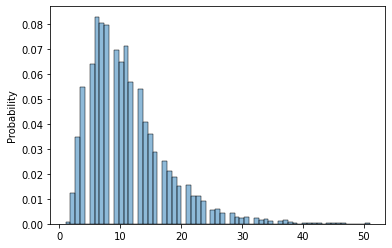

,count,mean,std,min,25%,50%,75%,max
0,6000.0,11.131667,6.419179,1.0,6.75,10.0,14.0,51.0


In [ ]:
req_df = pd.DataFrame(n_required)
# the list is loaded as a dataframe
sns.histplot(req_df, legend = False, stat='probability')
# the histogram is plotted
plt.show()
req_df.describe().T
# a brief statistical discription of the list is displayed


  This, of course, is a discrete probability distribution. 

  It really took me a while to think of a possible explanation for this distribution, and I'm still not sure I have the correct answer. 

  First, I thought of the Geomertic Distribution - the number of trials unitll first success. However in this standard distribution the probability is the same from trial to trial. So, this would be appropriate when modeling a generala game without the greedy strategy - rolling 5 dice continuously to get a generala, but not here. Also, the shape of the distribution is not like a geometric one. 

  Then, I thought of the Negative Binomial Dist. - number of trials until the kth success. But I don't think that's apporpirate to model this distribution. It also doesn't allow for chainging the p value between trials. A model that allows for changing p values is a hypergeometric distribution, but I don't think thats appropirate here too. 

  So, because the probabilities change from one trial to another is such as complex way, I think that a standard distribution is not appropriate. I think that this case would require a model build specifically for it with mathematical modeling.